<a href="https://colab.research.google.com/github/Luis-For/CiberBullying-Detection/blob/main/Cyberbullying_Detection_using_NLP_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Cyberbullying en Redes Sociales usando NLP y ML

**Estudiantes:**
- Camilo Andres Monsalve Garcia - 2021114054
- Sheylon Manuel Navarro Ballestas - 2020114218
- Luis Ángel Fornaris Rodríguez - 2019214048
- Nombre 4 - Codigo

**Curso:** Inteligencia Artificial
**Semestre:** 2025-II
**Docente:** Idanis Beatriz Diaz Bolao

---

### Objetivo general

Desarrollar un modelo de aprendizaje supervisado capaz de detectar y clasificar mensajes de ciberacoso (cyberbullying) en redes sociales, utilizando técnicas de Procesamiento de Lenguaje Natural (NLP). El modelo debe identificar si un texto contiene lenguaje ofensivo o discriminatorio hacia grupos por motivos de etnia/raza, religión, género/sexualidad, o si no constituye ciberacoso.

### Resumen ejecutivo

El presente trabajo tiene como propósito aplicar técnicas de aprendizaje supervisado para la detección y clasificación de mensajes de ciberacoso (cyberbullying) en redes sociales. Para ello, se utilizó un conjunto de datos denominado dara.json, compuesto por 99.989 publicaciones cortas, cada una etiquetada como not_cyberbullying, ethnicity/race, religion o gender/sexual.

Durante el desarrollo del proyecto se realizó una inspección y exploración detallada del dataset, observando un claro desbalance de clases, con predominancia de textos no ofensivos. Se aplicaron técnicas de procesamiento de lenguaje natural (NLP), incluyendo limpieza de texto, tokenización y vectorización mediante TF-IDF, para representar las publicaciones en un formato numérico adecuado para el entrenamiento de modelos.

Se implementaron y compararon varios modelos de aprendizaje supervisado, tales como Regresión Logística, Árboles de Decisión, Random Forest, Red Neuronal Multicapa (MLP) y Red Neuronal Profunda (DNN), utilizando la técnica de validación cruzada con GridSearchCV para ajustar los hiperparámetros y optimizar el rendimiento de cada uno.

HACE FALTA UNAS COSAs

*(Breve párrafo: describe el dataset, los modelos probados, resultados y conclusiones generales)*




# Tabla de Contenidos


    1. Contexto y Justificación
        I. Contexto  
        II. Definición del Problema de Aprendizaje  
        III. Descripción del Dataset  
        IV. Relevancia Ética y Social  

    2. Análisis Exploratorio de Datos (EDA)  
        I. Instalacion de librerias
        II. Carga y Estructura de los Datos  
        III. Distribución de Clases
        IV. Limpieza Preliminar (Nulos, Duplicados, Idioma)   
        V. Análisis de Longitud de los Textos   
        VI. Frecuencias y Palabras más Comunes  
        VII. Visualizaciones y Hallazgos  
        VIII. Conclusiones del EDA  
        IX. Filtrado de idioma

    3. Preprocesamiento de Datos  
        I. Limpieza de Texto  
            A. Eliminación de menciones, URLs y caracteres especiales  
            B. Normalización y minúsculas  
            C. Sustitución por tokens `<MENTION>`, `<URL>`  
        II. Tokenización y Lematización  
        III. Vectorización (TF-IDF, Hashing, Embeddings)
        IV. Generación de Features Adicionales
        V. Separación del Conjunto de Datos (Train / Test / Val)
        Vi. Manejo de Desbalance de Clases   
        VII. Construcción del Pipeline  

    4. Modelado y Entrenamiento  
        I. Modelos Base  
            A. Baseline (Clase Mayoritaria)  
            B. Naive Bayes  
            C. Regresión Logística  
        II. Modelos Intermedios  
            A. Linear SVC  
            B. Random Forest  
            C. MLP (Red Neuronal Simple)  
        III. Modelos Avanzados  
            A. Fine-tuning con Transformers (DistilBERT / BERT)  
        IV. Optimización de Hiperparámetros (GridSearchCV / RandomizedSearchCV)  
        V. Validación Cruzada  

    5. Evaluación y Resultados  
        I. Métricas de Evaluación (Accuracy, F1, Recall, Precision)  
        II. Resultados en Validación Cruzada  
        III. Resultados en el Conjunto de Prueba  
        IV. Matriz de Confusión  
        V. Curvas ROC y Precision-Recall  
        VI. Comparativa Global de Modelos  

    6. Análisis de Errores e Interpretabilidad  
        I. Análisis de Falsos Positivos y Falsos Negativos  
        II. Tokens más Influyentes (Coeficientes / SHAP / LIME)  
        III. Impacto del Desbalance y Sesgo  
        IV. Discusión de Resultados y Aprendizajes  

    7. Conclusiones
        I. Conclusiones Principales  
        II. Limitaciones del Estudio  
        III. Propuestas de Mejora  
        IV. Reflexión Ética y Responsabilidad del Modelo  

    8. Apéndices
        I. Reproducibilidad (Seeds, Versiones, Entorno)  
        II. Código Auxiliar y Funciones de Apoyo  
        III. Librerías Utilizadas  
        IV. Referencias bibliograficas

#1.Contexto y justificacion


### I. Contexto
Se entiende como el ciberbullyn el uso de algunas Tecnologías de la Información y la Comunicación como el correo electrónico, los mensajes del teléfono móvil, la mensajería instantánea, los sitios personales vejatorios y el comportamiento personal en línea difamatorio, de un individuo o un grupo, que deliberadamente, y de forma repetitiva y hostil, pretende dañar otro. [2]

Es una agresión repetitiva de uno o más individuos en contra de una persona, utilizando dispositivos o servicios de tecnología. El bullying puede darse de forma directa o indirecta, dependiendo de si la víctima identifica claramente o no a su agresor. Cuando es directo ocurre “cara a cara” y la forma indirecta puede darse, por ejemplo, con el esparcimiento de un rumor, de tal forma que la víctima no puede saber con facilidad quién lo inició. Otra clasificación se da
de acuerdo a la manera en que se origina: proactiva o reactiva. El primer caso se refiere a un hecho premeditado y planeado para obtener algo o imponerse a otras personas. El segundo se refiere a un hecho más espontáneo. [3]


como podemos darnos cuenta es algo que siempre ha existido, no son casos aislados, son casos donde el individuo que recive la agresion sufre bastante lo cual no es saludable para su salud mental. y ahi es donde entra nuestro proyecto, el entrenar modelos de deteccion de IA para que en algun punto todas las herramientas que encontramos en internet puedan implementar modelos similares con los cuales el acoso recibido a los usuarios sea suprimido, hoy en  dia ya hay plataformas que implementan herramientas similares, como lo son X (anteriormente twitter) o Facebook, las cuales si notan comentarios denigrantes, racistas, sexistas, homofobos y de esta indole al poco tiempo seran eliminados.



### II. Definición del problema

Se clasifica la definicion del problema en los siguientes datos:
- Tipo de aprendizaje: Clasificación supervisada multiclase  
- Variable objetivo: `label`  
- Entradas: texto de publicaciones (`text`)



### III. Descripción del dataset

Luego de descargar el archivo del kaggle encontramos lo siguiente:

- Fuente: Cyberbullying Detection Dataset (CC0)  
- Formato: JSON  
- Número de registros: ~99990
- Campos: `text`, `label`  
- Tamaño: 17Mb

En el archivo encontramos comentarios realizados por diversos usuarios angloparlantes de una redsocial popular, suponemos es X (anteriormente twitter). En el archivo se encuentra divido en `text` y `label`, el text da el comentario tomado y el label la clasificacion guardada en el diccionario. como ejemplo para comprender:

 `{"text":"@stylante @osuDramaDays Thanks nigga","label":"ethnicity\/race"}`

 encontramos un texto en ingles donde se etiquetan a dos personas (se asume que el arroba y el texto que sigue hasta el espacio es nickname o el nombre de usuario) donde el autor dice; "thanks nigga" el cual efectivamente se categoriza en el `label` como "ethnicity\/race" pues considera un insulto racial o etnico.




### IV. Relevancia ética y social

El trabajo es relevante social y eticamente pues hoy mas que nunca, con el auge de las tecnologias detectar rapidamente estos ataques por cualquier motivo en la red es mas necesario, vivimos en un momento donde cualquier puede expresar lo que quiera en la red y el no poder controlar o eliminar rapidamente estos comentarios hacen que las redes se llenen de odio imnecesario.

#2.Analis exploratorio de los datos



### I. Instalacion de librerias



Instalacion y carga de todas las librerias que podamos usar a lo largo de todo el notebook

In [ ]:
#Cargar el google drive para poder cargar el json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Instalacion para limpieza de texto y tokenizacion

!pip install --quiet unidecode transformers wordcloud langdetect emoji

!pip install langdetect tqdm fasttext-langdetect langid

!pip install fasttext

!pip install better_profanity

!pip install textblob

!pip install transformers torch datasets -q

#Librerias para el manejo de datos

import numpy as np
import pandas as pd
import string
import re
import nltk
import json
from unidecode import unidecode

#librerias para nlp y preprocesamiento

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from langdetect import detect
import emoji

# Descarga de recursos NLTK necesarios
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#Vectorización
from sklearn.feature_extraction.text import TfidfVectorizer

#librerias sklearn para vectorizacion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#librerias para modelado
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments #modelado transformer
import torch

#librerias para metricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

#librerias para visualizar resultados
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#configuraciones generales
import warnings
warnings.filterwarnings('ignore')

# Estilo de gráficos
plt.style.use('seaborn-v0_8-muted')

# Mostrar configuración inicial
print("Librerías instaladas y cargadas correctamente.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7501 sha256=9ed71d930a0361c9bda0d16cbc56f83367ff313c30273e150e10a3ed2f14de3e
  Stored in directory: /root/.cache/pip/wheel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Librerías instaladas y cargadas correctamente.


###II. Carga y Estructura de los Datos  





Se importan las librerias correspondientes, y se ejecuta el archivo lo cual nos trae efectivamente los primeros datos de .json

In [ ]:
# Ruta del archivo JSON en Google Drive
rt_reviews = "/content/drive/MyDrive/IA/datos.json"

import pandas as pd

# Leer el archivo JSON en un DataFrame
df = pd.read_json(rt_reviews, encoding='ISO-8859-1', nrows=100000, lines=True)

# Verificar que los datos se hayan cargado correctamente
print(df.head())

                                                text              label
0  @ZubearSays Any real nigga isn't letting this ...     ethnicity/race
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  You saudias are not friends of Muslim idiots c...           religion
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...           religion


Aca se muestran ordenamanete via xlms los datos del archivo.json

In [ ]:
df[['label','text']].head()

,label,text
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se modifica un poco el codigo para que nos de los valores que son distintos de `label`

In [ ]:
unique_labels = df['label'].unique()
print("Unique labels in the dataset:")
print(unique_labels)

Unique labels in the dataset:
['ethnicity/race' 'not_cyberbullying' 'religion' 'gender/sexual']


###III. Distribucion de clases



En las siguientes gráfica de barras se puede apreciar el balaceo de los datos en la categorias por colores y donde como primer resultado visible tenemos que la mayoria de casos son "not cyberbulling".

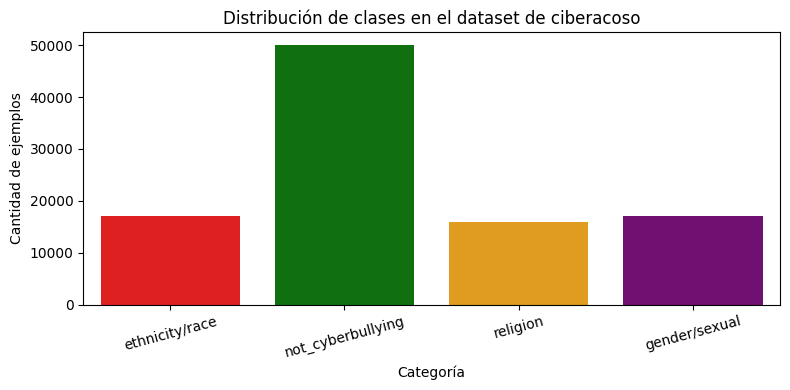

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 4))

# Crear un countplot con las categorías del dataset de ciberacoso
sns.countplot(data=df, x='label', palette={
    'not_cyberbullying': 'green',
    'ethnicity/race': 'red',
    'religion': 'orange',
    'gender/sexual': 'purple'
})

# Configurar los ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de clases en el dataset de ciberacoso')
plt.xticks(rotation=15)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

###IV. Limpieza preliminar (Nulos, Duplicados e idiomas)





En este bloque de código se realiza un proceso de limpieza inicial del conjunto de datos para asegurar la calidad de la información antes del análisis y modelado.  

Primero, se eliminan las filas que contienen valores nulos en las columnas principales (`text` y `label`), ya que estos registros no aportan información útil al modelo.

Posteriormente, se remueven los textos duplicados con el fin de evitar repeticiones que puedan sesgar el entrenamiento o la evaluación de los modelos de aprendizaje supervisado.  

Este paso garantiza que el dataset utilizado esté compuesto únicamente por datos completos, únicos y consistentes, lo cual mejora la fiabilidad de los resultados en etapas posteriores del proyecto.

In [ ]:
# Mostrar cantidad inicial de registros
print(f"Registros originales: {len(df)}")

# Eliminar filas con valores nulos en 'text' o 'label'
df = df.dropna(subset=['text', 'label'])

# Eliminar duplicados basados en el texto original
df = df.drop_duplicates(subset=['text'])

# Mostrar cantidad final de registros
print(f"Después de eliminar nulos y duplicados: {len(df)} registros")

# Vista previa del DataFrame limpio
df.head(10)

Registros originales: 99990
Después de eliminar nulos y duplicados: 99989 registros


,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
5,@areyalldizzy @soobroll wait its so bad………. th...,ethnicity/race
6,A voting machine error in New Jersey flipped t...,not_cyberbullying
7,"@Leeo2680 @KeaweWong Now in President Jokowi, ...",religion
8,@NaTuRaLbeautyME @Phil_Lewis_ Agreed @NaTuRaLb...,ethnicity/race
9,"Linked in an email, 'Sarah, you're on a roll w...",not_cyberbullying


##### A. Analisis de idiomas

Decidimos analizar los idiomas de todo el set para poder determinar si hay comentarios de otros idiomas que estemos pasando por alto a la hora de realizar las mediciones y encontramos que efectivamente, aunque su gran mayoria son en ingles, hay valor hay menos de 5000 que no estan en ese idioma

In [ ]:
import pandas as pd
from multiprocessing import Pool, cpu_count
from langdetect import detect, DetectorFactory
from tqdm import tqdm

DetectorFactory.seed = 0

def efficient_detect(text):
    """Función eficiente para recursos limitados"""
    if not isinstance(text, str):
        return 'empty'

    text = text.strip()
    if not text:
        return 'empty'
    if len(text) < 10:
        return 'too_short'

    try:
        return detect(text[:100])
    except:
        return 'error'

def optimized_for_2cores(texts, n_workers=2, chunk_size=200):
    with Pool(n_workers) as pool:
        results = list(tqdm(
            pool.imap(efficient_detect, texts, chunksize=chunk_size),
            total=len(texts),
            desc="Progreso"
        ))

    return results

if 'text' in df.columns:
    df['language'] = optimized_for_2cores(df['text'].tolist(), n_workers=2, chunk_size=200)
    print(" Completado!")
    print(df['language'].value_counts())

Progreso: 100%|██████████| 99989/99989 [06:44<00:00, 247.48it/s]

 Completado!
language
en           94749
tl             768
af             603
de             370
id             356
cy             339
no             333
so             332
sv             294
nl             289
et             280
da             202
fr             167
it             157
pl              87
ca              85
sw              69
ro              64
es              61
hr              55
tr              47
fi              47
pt              45
sl              39
vi              31
sq              23
sk              21
too_short       19
cs              18
error           16
hu              10
lt               6
lv               2
ur               1
ar               1
ja               1
ta               1
hi               1
Name: count, dtype: int64


####  b. Resumen estadistico
El dataset se encuentra conformado por **99.989** filas los cuales constan de una cadena de diferente longitudes con multiples palabras entre edad resultantes solo las que no son palabras vacias y tienen un significado

El análisis de longitud de textos por clase revela distribuciones desiguales entre las diferentes categorías, lo cual es completamente esperado en comentarios de redes sociales. Observamos que cada tipo de comentario presenta características de longitud particulares, donde algunas clases contienen textos notablemente más cortos - probablemente correspondientes a respuestas simples o interacciones básicas - mientras que otras muestran textos más extensos, seguramente relacionados con opiniones elaboradas o descripciones detalladas.

Esta variabilidad refleja los patrones naturales de comunicación que los usuarios emplean según la intención de su mensaje, siendo una característica intrínseca de las interacciones en plataformas sociales. Las diferencias entre clases no solo son normales, sino que constituyen rasgos distintivos que podriamos llegar a utilizar.

### V. Análisis de Longitud de Textos


Analisamos tambien la longitud de los datos de nuestro dataset para ir verificando como estos reacionan

In [ ]:
# Creacion de columna para palabras y caracteres
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

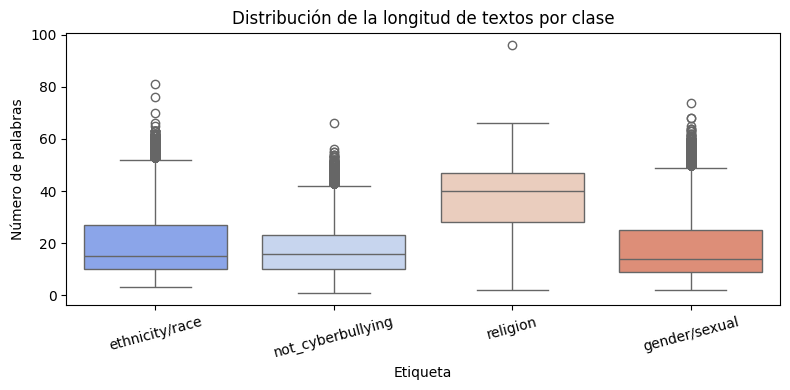

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='label', y='word_count', palette='coolwarm')
plt.title('Distribución de la longitud de textos por clase')
plt.xlabel('Etiqueta')
plt.ylabel('Número de palabras')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

El análisis de longitud de textos por clase revela distribuciones desiguales entre las diferentes categorías, lo cual es completamente esperado en comentarios de redes sociales. Observamos que cada tipo de comentario presenta características de longitud particulares, donde algunas clases contienen textos notablemente más cortos - probablemente correspondientes a respuestas simples o interacciones básicas - mientras que otras muestran textos más extensos, seguramente relacionados con opiniones elaboradas o descripciones detalladas.



###VI. Frecuencias  y palabra comunes.



En este bloque de código se realiza un análisis descriptivo del contenido textual del conjunto de datos.  El objetivo es calcular el número promedio de palabras y caracteres de los textos para cada una de las categorías (`label`) presentes en el dataset.  

Este análisis permite identificar diferencias en la extensión de los mensajes según su tipo (por ejemplo, textos ofensivos frente a no ofensivos), lo que puede aportar información útil para comprender el comportamiento del lenguaje en cada clase y orientar el preprocesamiento o la selección de modelos en etapas posteriores.

In [ ]:
!pip install tabulate

from tabulate import tabulate  # Librería para imprimir tablas formateadas

# Verificar que existan las columnas necesarias
if 'text' in df.columns and 'label' in df.columns:
    print("\n-- Estadísticas de texto por etiqueta (word_count, char_count) --")

    # Crear columnas con el conteo de palabras y caracteres
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['text'].apply(lambda x: len(str(x)))

    # Agrupar por etiqueta ('label') y calcular estadísticas descriptivas
    stats_by_label = df.groupby('label')[['word_count', 'char_count']].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )

    # Renombrar columnas para que sean más legibles
    stats_by_label.columns = ['_'.join(col).strip() for col in stats_by_label.columns.values]

    # Mostrar resultados como tabla con formato elegante
    print(tabulate(stats_by_label, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

else:
    print("ERROR: No se encontró la columna 'text' o 'label' en el DataFrame.")


-- Estadísticas de texto por etiqueta (word_count, char_count) --
╒═══════════════════╤════════════════════╤═══════════════════╤═════════════════════╤══════════════════╤══════════════════╤══════════════════╤════════════════════╤═══════════════════╤═════════════════════╤══════════════════╤══════════════════╤══════════════════╕
│ label             │   word_count_count │   word_count_mean │   word_count_median │   word_count_std │   word_count_min │   word_count_max │   char_count_count │   char_count_mean │   char_count_median │   char_count_std │   char_count_min │   char_count_max │
╞═══════════════════╪════════════════════╪═══════════════════╪═════════════════════╪══════════════════╪══════════════════╪══════════════════╪════════════════════╪═══════════════════╪═════════════════════╪══════════════════╪══════════════════╪══════════════════╡
│ ethnicity/race    │           17000.00 │             20.58 │               15.00 │            14.50 │             3.00 │            81.00 │      

Del análisis de longitud se observa que los comentarios sobre religión destacan por ser significativamente más extensos, con un promedio de 37 palabras, casi el doble que las demás categorías. Esto sugiere que los usuarios tienden a desarrollar argumentos más elaborados cuando abordan temas religiosos. Por el contrario, los comentarios no ofensivos muestran la menor variabilidad, con textos más concisos y uniformes en su longitud.

Las categorías de etnia/raza y género/sexual presentan longitudes intermedias pero con distribuciones más dispersas, lo que refleja una mayor diversidad en los estilos de comunicación dentro de estos temas. Estas diferencias en extensión revelan patrones distintivos en cómo los usuarios se expresan según la temática, siendo el contenido religioso notablemente más detallado que el resto de las categorías analizadas.

### VII. Visualizacion y hallazgos


En esta sección presentamos distintas representaciones gráficas que permiten observar patrones y relaciones relevantes dentro del dataset, complementando los análisis numéricos previos.

#### A. Matriz de correlación:



Primeras filas de las características extraídas:
   word_count  char_count  unique_word_count  avg_word_length  lexical_diversity
0         8.0        53.0                8.0         5.750000           1.000000
1        22.0       162.0               21.0         6.409091           0.954545
2        10.0        43.0                9.0         3.400000           0.900000
3        10.0        61.0               10.0         5.200000           1.000000
4        51.0       324.0               46.0         5.372549           0.901961
5        10.0        65.0               10.0         5.600000           1.000000
6        27.0       155.0               26.0         4.777778           0.962963
7        37.0       236.0               34.0         5.405405           0.918919
8        49.0       313.0               37.0         5.387755           0.755102
9        27.0       143.0               27.0         4.333333           1.000000

Matriz de correlación (Pearson):
╒═══════════════════╤════

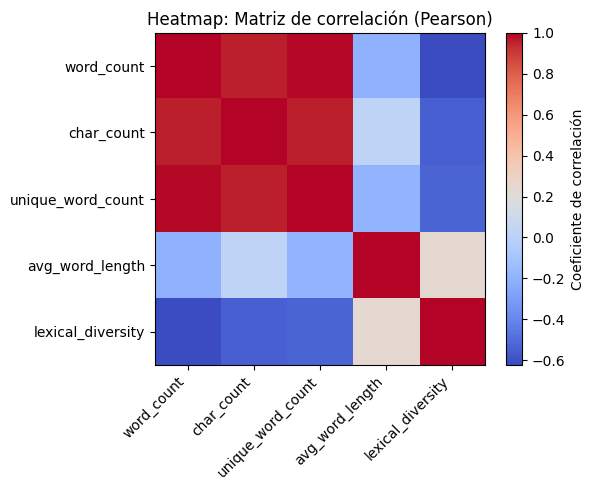

In [ ]:

# Este bloque calcula una matriz de correlación entre características textuales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate  # Para mostrar tablas en consola

# Verificar que el DataFrame existe y contiene la columna necesaria
try:
    df  # verificar existencia de df
except NameError:
    raise RuntimeError("No se encontró un DataFrame llamado 'df' en el entorno. Carga los datos antes de ejecutar este bloque.")

if 'text' not in df.columns:
    raise RuntimeError("El DataFrame existe pero no contiene la columna 'text'. Asegúrate de que los datos se hayan cargado correctamente.")

#Función para extraer características textuales

def extract_text_features(s):
    """Extrae características numéricas a partir de una cadena de texto."""
    s = "" if pd.isna(s) else str(s)
    words = s.split()
    word_count = len(words)
    char_count = len(s)
    unique_word_count = len(set(words))
    avg_word_length = (sum(len(w) for w in words) / word_count) if word_count > 0 else 0.0
    lexical_diversity = (unique_word_count / word_count) if word_count > 0 else 0.0
    return pd.Series({
        'word_count': word_count,
        'char_count': char_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'lexical_diversity': lexical_diversity
    })

# Aplicar la función a la columna 'text'
features_df = df['text'].apply(extract_text_features)

# Mostrar una muestra de las características extraídas
print("\nPrimeras filas de las características extraídas:")
try:
    import caas_jupyter_tools as cjt
    cjt.display_dataframe_to_user("Características de texto (muestra)", features_df.head(10))
except Exception:
    print(features_df.head(10).to_string())


#  Calcular y visualizar la matriz de correlación

corr_matrix = features_df.corr(method='pearson')

print("\nMatriz de correlación (Pearson):")
print(tabulate(corr_matrix, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

# Mostrar el heatmap
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, aspect='auto', interpolation='nearest', cmap='coolwarm')
plt.colorbar(label='Coeficiente de correlación')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Heatmap: Matriz de correlación (Pearson)')
plt.tight_layout()
plt.show()



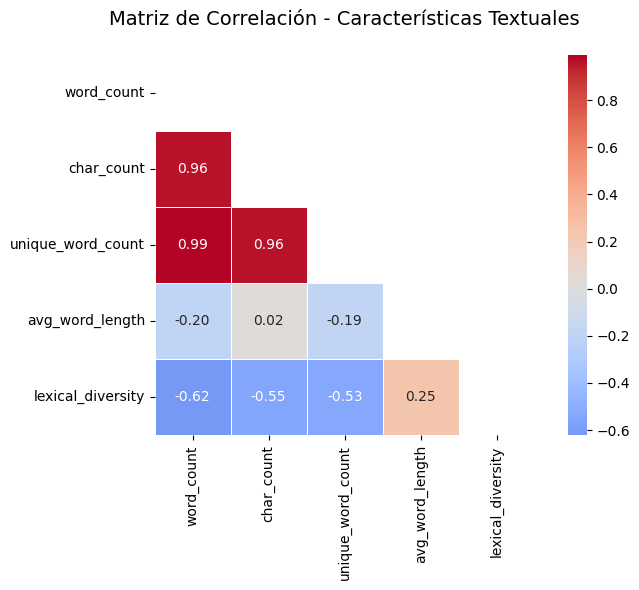

In [ ]:
# otra vista de esa matriz tipo triangular para obsevar mejor los datos
def extract_text_features(s):
    """Extrae características textuales con manejo robusto de errores"""
    if pd.isna(s) or s is None:
        s = ""
    else:
        s = str(s).strip()

    if not s:
        return pd.Series({
            'word_count': 0, 'char_count': 0, 'unique_word_count': 0,
            'avg_word_length': 0.0, 'lexical_diversity': 0.0
        })

    words = s.split()
    word_count = len(words)
    char_count = len(s)
    unique_word_count = len(set(words))

    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0.0
    lexical_diversity = unique_word_count / word_count if word_count > 0 else 0.0

    return pd.Series({
        'word_count': word_count,
        'char_count': char_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'lexical_diversity': lexical_diversity
    })
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Características Textuales\n', fontsize=14)
plt.tight_layout()
plt.show()

Se observan correlaciones muy fuertes (>0.95) entre word_count, char_count y unique_word_count, lo que es esperable ya que a más palabras, más caracteres y más palabras únicas. La diversidad léxica muestra correlación negativa moderada con estas variables (-0.55 a -0.63), indicando que textos más largos tienden a repetir palabras. La longitud promedio de palabras es prácticamente independiente de las demás variables.

#### B. Palabra mas comunes -  Nube de Palabras (WordCloud)




En este bloque de código se genera una nube de palabras (WordCloud) para cada categoría del conjunto de datos.  
Esta visualización permite identificar las palabras más frecuentes dentro de los textos asociados a cada tipo de etiqueta (*not_cyberbullying*, *ethnicity/race*, *religion*, *gender/sexual*).  

De esta manera, es posible evidenciar los términos más representativos y repetitivos en cada clase, lo cual facilita una comprensión inicial del lenguaje y los patrones que caracterizan los mensajes ofensivos o no ofensivos en redes sociales.

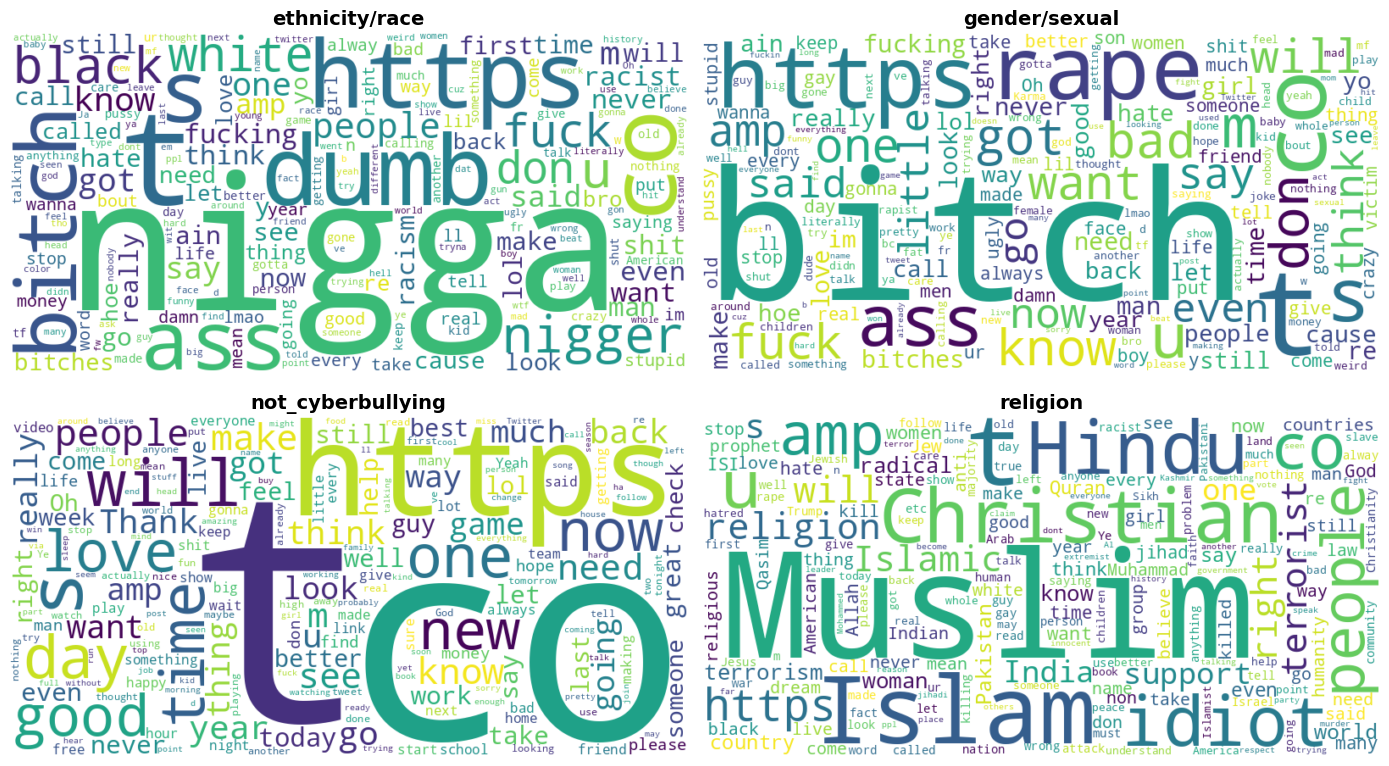

In [ ]:
# Importar las librerías necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar las palabras por categoría (etiqueta)
# Se asume que 'df' contiene las columnas 'label' y 'text'
#clean_text para verlo limpio
palabras_por_categoria = df.groupby('label')['text'].apply(lambda x: ' '.join(x.astype(str)))

# Crear un WordCloud para cada categoría
wordclouds = {}
for categoria, texto in palabras_por_categoria.items():
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(texto)
    wordclouds[categoria] = wc

# Mostrar los WordClouds para cada categoría
plt.figure(figsize=(14, 8))

for i, (categoria, wc) in enumerate(wordclouds.items(), start=1):
    plt.subplot(2, 2, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(categoria, fontsize=14, weight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()


### VIII. Conclusiones del capitulo



El análisis exploratorio de datos permitió comprender la estructura y las características generales del conjunto de datos del proyecto.
Se observó un claro desbalance de clases, con una marcada predominancia de la categoría not_cyberbullying, lo que sugiere la necesidad de aplicar estrategias de reajuste de clases durante el modelado (class weights).

En términos lingüísticos, la mayoría de los textos se encuentran en idioma inglés, con una pequeña proporción de mensajes en otros idiomas (africano, tagalo, alemán, etc.), los cuales pueden ser filtrados para evitar ruido.

Los mensajes ofensivos suelen ser más cortos y directos, mientras que los no ofensivos presentan mayor extensión y complejidad léxica, lo que podría servir como rasgo discriminativo en las etapas de aprendizaje automático.

El análisis de palabras más frecuentes y las nubes de palabras revelaron que los mensajes ofensivos contienen términos claramente asociados a discriminación racial o religiosa, mientras que los mensajes neutros muestran un vocabulario más general.

En conjunto, se confirma que el dataset es adecuado para un enfoque de clasificación supervisada, y proporciona información valiosa para diseñar un pipeline de limpieza, vectorización y modelado ajustado a las características del lenguaje presente en redes sociales.

### IX. Filtrado de idioma

se añade este filtrado para que a la hora del procesamiento de los datos solo tome los datos en ingles, dejando de lado por el momento los otros idiomas, ahora. esto sera el puente entre el analisis de los datos y el procesamiento de estos mismos

In [ ]:
import pandas as pd
from langdetect import detect, LangDetectException
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

# --- BEGIN: Logic to ensure 'language' column exists (copied from previous cells) ---
if 'language' not in df.columns:
    print("Warning: 'language' column not found, attempting to detect languages...")
    DetectorFactory.seed = 0 # Ensure reproducibility for langdetect

    def efficient_detect(text):
        if not isinstance(text, str) or not text.strip():
            return 'empty'
        if len(text) < 10:
            return 'too_short'
        try:
            return detect(text[:100]) # Detect based on first 100 chars for efficiency
        except LangDetectException:
            return 'error'

    def optimized_for_2cores(texts, n_workers=2, chunk_size=200):
        with Pool(n_workers) as pool:
            results = list(tqdm(
                pool.imap(efficient_detect, texts, chunksize=chunk_size),
                total=len(texts),
                desc="Progreso"
            ))
        return results

    if 'text' in df.columns:
        print(f"\nConfiguración para {cpu_count()} cores:")
        print(f"   Workers: {cpu_count()}")
        print(f"   Chunk size: 200")
        print(f"   Textos a procesar: {len(df['text'].tolist())}")
        df['language'] = optimized_for_2cores(df['text'].tolist(), n_workers=cpu_count(), chunk_size=200)
        print(" Language detection completed.")
    else:
        raise KeyError("'text' column is required to detect language, but it's missing.")
# --- END: Logic to ensure 'language' column exists ---

# 1. Ver estado actual
print("=== ESTADO INICIAL ===")
print(f"Registros totales: {len(df)}")
print("Distribución de idiomas:")
print(df['language'].value_counts().head())

# 2. Filtrar
print("\n=== FILTRANDO ===")
df = df[df['language'] == 'en'].reset_index(drop=True)

# 3. Verificar
print("=== ESTADO FINAL ===")
print(f"Registros en inglés: {len(df)}")
print("Idiomas únicos:", df['language'].unique())

# 4. Confirmación
if len(df['language'].unique()) == 1 and df['language'].unique()[0] == 'en':
    print("FILTRADO EXITOSO - Solo hay texto en inglés")
else:
    print("ERROR - Aún hay otros idiomas")

=== ESTADO INICIAL ===
Registros totales: 99989
Distribución de idiomas:
language
en    94749
tl      768
af      603
de      370
id      356
Name: count, dtype: int64

=== FILTRANDO ===
=== ESTADO FINAL ===
Registros en inglés: 94749
Idiomas únicos: ['en']
FILTRADO EXITOSO - Solo hay texto en inglés


In [ ]:
# Guardar el dataset ya filtrado para no tener que repetir el proceso
df.to_csv('dataset_ingles.csv', index=False)
print("Dataset guardado como 'dataset_ingles.csv'")

Dataset guardado como 'dataset_ingles.csv'


#3.Procesamiento de datos


### I. Limpieza de texto

En esta etapa se realizó un proceso de preprocesamiento con el fin de preparar los datos textuales para su análisis.
En esto se eliminaron elementos no relevantes como menciones a usuarios, URLs y caracteres especiales, los cuales no aportan valor semántico al contenido.

Posteriormente, se aplicó una normalización del texto, convirtiendo todas las palabras a minúsculas para garantizar uniformidad y evitar duplicidad entre términos que difieren solo por mayúsculas o minúsculas.

Además, se sustituyeron las menciones y las direcciones web por los tokens especiales <MENTION> y <URL>, respectivamente, con el objetivo de conservar la estructura del texto sin perder la referencia a estos elementos.


In [ ]:
### I. Limpieza de texto

# En esta etapa se limpian los textos para eliminar ruido como menciones, URLs, caracteres especiales,
# números y stopwords, además de normalizar acentos y unificar el formato a minúsculas.
# También se reemplazan menciones y enlaces con tokens <MENTION> y <URL> para conservar su presencia contextual.

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode

# Descargar recursos necesarios (solo la primera vez)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) #No eliminar
nltk.download('stopwords', quiet=True)

# Configurar stopwords base + personalizadas
stop_words = set(stopwords.words('english'))
custom_stopwords = {'rt', 'amp', 'u', 'im', 'dont', 'cant', 'wont', 'like', 'get', 'go', 'know', 'think', 'good'}
stop_words.update(custom_stopwords)

def clean_english_text(text):
    """Limpia texto en inglés eliminando ruido, normalizando acentos y manteniendo estructura contextual."""
    if not isinstance(text, str) or not text.strip():
        return ""

    # Normalización básica
    text = text.lower().strip()
    text = unidecode(text)  # elimina acentos (por ejemplo: “niño” → “nino”)

    # Sustituir menciones y URLs con tokens especiales
    text = re.sub(r'@\w+', '<MENTION>', text)
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)

    # Eliminar caracteres no alfabéticos pero mantener espacios y tokens
    text = re.sub(r'[^a-z\s<>]', ' ', text)

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenización
    tokens = word_tokenize(text)

    # Filtrar stopwords y tokens muy cortos/largos
    tokens = [
        t for t in tokens
        if t not in stop_words and 2 < len(t) < 20 and t.isalpha()
    ]

    return " ".join(tokens)

# Aplicar limpieza
df["clean_text"] = df["text"].apply(clean_english_text)

# Confirmar resultados
print(" Limpieza completada correctamente")

# Mostrar algunos ejemplos antes y después
print("\n Ejemplo de limpieza:")
print("=" * 80)
for i in range(3):
    original = df['text'].iloc[i]
    cleaned = df['clean_text'].iloc[i]
    print(f"Ejemplo {i+1}:")
    print(f"Original: {original[:150]}..." if len(original) > 150 else f"Original: {original}")
    print(f"Limpio:   {cleaned}\n" + "-" * 80)



### II. Tokenización
Una vez limpio el texto, se procedió a la tokenización, es decir, la división del texto en unidades mínimas llamadas tokens (palabras o símbolos relevantes). Este paso permite un manejo más preciso del lenguaje y facilita las operaciones posteriores de análisis.

Finalmente, se aplicó la lematización, técnica que transforma las palabras a su forma base o lema (por ejemplo, “corriendo” → “correr”). Esto permite reducir la variabilidad léxica y mejorar la representación semántica de los datos, favoreciendo un análisis más coherente y preciso.


In [ ]:
#trabajar solo con inglés
if 'language' in df.columns:
    df = df.copy()
    df_en = df[df['language'] == 'en'].reset_index(drop=True)
else:
    df_en = df.copy()



####  A. Tokenizacion basica y post limpieza

siendo el objetivo convertir clean_text (string) → tokens (lista de strings).

In [ ]:
# Verificar si existe la columna clean_text y qué tan completa está
if 'clean_text' in df.columns:
    print("Columna 'clean_text' encontrada.")
    print(f"Registros totales: {len(df)}")
    print(f"Registros vacíos o nulos: {df['clean_text'].isna().sum() + df['clean_text'].eq('').sum()}")
else:
    print("No existe la columna 'clean_text'. Debes crearla con la función de limpieza del texto.")


In [ ]:
stop_words = set(stopwords.words('english'))  # puedes añadir/customizar
lemmatizer = WordNetLemmatizer()

def basic_tokenize(text, remove_stopwords=True):
    if not isinstance(text, str) or not text.strip():
        return []
    tokens = word_tokenize(text)
    filtered = [
        t for t in tokens
        if t.isalpha() and 2 < len(t) < 25
    ]
    if remove_stopwords:
        filtered = [t for t in filtered if t not in stop_words]
    return filtered

df_en['tokens'] = df_en['clean_text'].apply(lambda x: basic_tokenize(x, remove_stopwords=True))
df_en['n_tokens'] = df_en['tokens'].apply(len)


#### B. Postagging y lematizacion para todo el dataframe


In [ ]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios (maneja ambas versiones del tagger)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Intentar cargar el nuevo tagger; si no, usar el viejo
try:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)
    pos_tag(['test'])  # prueba rápida
except LookupError:
    nltk.download('averaged_perceptron_tagger', quiet=True)

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Función para mapear etiquetas POS (Treebank → WordNet)
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Función principal: tokeniza, etiqueta POS y lematiza
def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(token, get_wordnet_pos(pos))
        for token, pos in pos_tags
    ]
    return " ".join(lemmatized)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# Aplicar lematización a cada texto
df['lemmatized_text'] = df['clean_text'].progress_apply(lemmatize_text)

print("Lematización completada correctamente para todo el dataset.")

# Mostrar ejemplos comparativos
print("\nEJEMPLOS DE LEMATIZACIÓN:")
print("=" * 90)
for i in range(3):
    print(f"Ejemplo {i+1}:")
    print(f"Antes:  {df['clean_text'].iloc[i]}")
    print(f"Después: {df['lemmatized_text'].iloc[i]}")
    print("-" * 90)

# Calcular estadísticas de longitud de tokens antes y después
df['tokens_before'] = df['clean_text'].apply(lambda x: len(word_tokenize(x)))
df['tokens_after'] = df['lemmatized_text'].apply(lambda x: len(word_tokenize(x)))

print("\nESTADÍSTICAS DE TOKENIZACIÓN:")
print(f"Promedio de tokens antes:  {df['tokens_before'].mean():.2f}")
print(f"Promedio de tokens después: {df['tokens_after'].mean():.2f}")
print(f"Reducción promedio: {100 * (1 - df['tokens_after'].mean() / df['tokens_before'].mean()):.2f}%")


El proceso de tokenización y lematización nos ayudo a transformar los textos en unidades lingüísticas más uniformes y con significado coherente. Con el etiquetado gramatical (POS tagging) y el mapeo a las categorías de WordNet, cada palabra se redujo a su forma base, eliminando variaciones morfológicas innecesarias.

Aunque la reducción promedio en el número de tokens fue pequeña, esto debido a que los mensajes en redes sociales son cortos y simples, el texto resultante tiene una estructura lingüística más estable y util para lo que vamos a usarla en los proximos pasos

### III. Vectorización (TF-IDF, Hashing, Embeddings)


una vez ya hemos limpiado y tokenizado, lo siguiente que haremos sera convertir las palabras en una representación numérica. para poder ser comprendido por las maquinas, utilizaremos tecnicas de vectorizacion que asignan a cada palabra o documento un conjunto de valores numéricos.

Entre los métodos más comunes se encuentran:



*   Bag of Words (BoW)
*   TF-IDF (Term Frequency - Inverse Document Frequency)
*   Hashing Vectorizer
*   Embeddings (Word2Vec, GloVe, etc.)

tambien realizaremos una visualización exploratoria para identificar los términos más frecuentes por categoría, lo que ayuda a interpretar las diferencias entre clases y evaluar si el preprocesamiento ha sido efectivo.

#### A. preparacion de texto para vectorizar

In [ ]:
# Verificar columnas necesarias
if 'clean_text' not in df.columns:
    raise ValueError("No se encontró la columna 'clean_text'. Asegúrate de ejecutar la limpieza previa.")
if 'label' not in df.columns:
    raise ValueError("No se encontró la columna 'label'.")

# Eliminar textos vacíos
df = df[df['clean_text'].str.strip().ne('')]

# Codificar las etiquetas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Verificación
print("Etiquetas codificadas:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("\nTamaño final del dataset:", df.shape)
df.head(3)


#### B. Vectorizacion con TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuración del vectorizador
tfidf = TfidfVectorizer(
    max_features=5000,      # limita a las 5000 palabras más relevantes
    ngram_range=(1,2),      # incluye unigramas y bigramas
    sublinear_tf=True,      # suaviza las frecuencias
    stop_words='english'    # elimina stopwords en inglés
)

# Ajuste y transformación
X_tfidf = tfidf.fit_transform(df['lemmatized_text'])
y = df['label_encoded']

print(f"Forma de la matriz TF-IDF: {X_tfidf.shape}")


Forma de la matriz TF-IDF: (94708, 5000)


#### D. Vectorizacion alternat con hashing

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vect = HashingVectorizer(
    n_features=5000,
    alternate_sign=False,
    norm='l2',
    stop_words='english'
)
X_hash = hash_vect.fit_transform(df['lemmatized_text'])


#### E. prueba comparacion metodos vectorizacion

In [ ]:
# Verificar la forma de la matriz
print("Forma de la matriz TF-IDF:", X_tfidf.shape)

# Mostrar las 30 primeras palabras más representadas
top_features = list(tfidf.get_feature_names_out()[:30])
print(" Ejemplo de features extraídas (primeras 30):")
print(top_features)

# Mostrar el vector numérico del primer documento
print("\n Ejemplo de vector TF-IDF (primer texto):")
print(X_tfidf[0].toarray()[0][:20])


La mayoría de valores aparecen como 0 porque el vector TF-IDF es altamente disperso.
Cada texto contiene muy pocas de las 5000 palabras del vocabulario total,
por lo que la mayoría de posiciones corresponden a términos que no están presentes
en este documento específico. pero cuando buscamos directamente sobre palabras como real, nigga y asi obtenemos efectivamente un valor distinto a 0

In [ ]:
# Mostrar solo los términos con peso distinto de cero en el primer texto
row = X_tfidf[0]
indices_no_cero = row.nonzero()[1]
features = tfidf.get_feature_names_out()

print(f" Vector TF-IDF del primer texto (solo valores != 0):\n")
for idx in indices_no_cero:
    print(f"{features[idx]:<15} → {row[0, idx]:.3f}")


#### F. worldcloud por clase

In [ ]:
# Importar las librerías necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar las palabras por categoría (etiqueta)
# Se asume que 'df' contiene las columnas 'label' and 'clean_text'
palabras_por_categoria = df.groupby('label')['lemmatized_text'].apply(lambda x: ' '.join(x.astype(str)))

# Crear un WordCloud para cada categoría
wordclouds = {}
for categoria, texto in palabras_por_categoria.items():
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(texto)
    wordclouds[categoria] = wc

# Mostrar los WordClouds para cada categoría
plt.figure(figsize=(14, 8))

for i, (categoria, wc) in enumerate(wordclouds.items(), start=1):
    plt.subplot(2, 2, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(categoria, fontsize=14, weight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

notamos que con respetco a la grafica pasada si hay diferencias notables en los datos obtenidos lo cual indica que la limpieza, tokenizacion y lematizacion ha ayudado a empezar a manejar los datos para tener unos datos mejor manejados y utiles.

### IV. Generación de Features Adicionales

#### A. Caracteristicas basicas textuales

In [ ]:
import numpy as np
import re

# Función para detectar elongaciones de letras (ej. "soooo", "hellooo")
def count_elongation(text):
    return len(re.findall(r'(.)\1{2,}', text))

# Features estructurales
df['char_count'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['clean_text'].apply(lambda x: len(set(x.split())))
df['avg_word_len'] = df['clean_text'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)
df['upper_ratio'] = df['clean_text'].apply(lambda x: sum(1 for c in x if c.isupper()) / (len(x) + 1))
df['digit_count'] = df['clean_text'].str.count(r'\d')
df['punct_count'] = df['clean_text'].str.count(r'[^\w\s]')
df['excl_count'] = df['clean_text'].str.count(r'!')
df['ques_count'] = df['clean_text'].str.count(r'\?')
df['elongation_count'] = df['clean_text'].apply(count_elongation)

# Detección de menciones o URLs sobre el texto original
df['has_mention'] = df['text'].str.contains(r'@\w+').astype(int)
df['has_url'] = df['text'].str.contains(r'http|www').astype(int)

# Diversidad léxica
df['lexical_diversity'] = df['unique_word_count'] / (df['word_count'] + 1)

print("Ejemplo de características textuales:")
df[['text','char_count','word_count','avg_word_len','punct_count','has_mention','has_url']].head(3)


KeyError: 'clean_text'

Los valores de char_count, word_count, avg_word_len, punct_count, has_mention, has_url muestran diferencias sutiles entre mensajes con ciberacoso y los normales. esto nos lleva a la longitud de que los mensajes, el uso de signos de exclamación o la presencia de menciones/URLs pueden ser señales útiles para discriminar mensajes ofensivos o agresivos. Estos atributos complementan la información del contenido textua

#### B. Caracteristicas semanticas (sentimientos, insultos, etc)

In [ ]:

from textblob import TextBlob
from better_profanity import profanity

# Cargar diccionario de palabras ofensivas en inglés
profanity.load_censor_words()

# Lista de negaciones en inglés
negations = set([
    'no', 'not', 'never', 'none', 'nobody', 'nothing', 'neither', 'nor', 'nowhere',
    'hardly', 'scarcely', 'barely'
])

# Función para contar palabras ofensivas usando better_profanity
def count_profanity(text):
    words = text.split()
    return sum(1 for w in words if profanity.contains_profanity(w))

# Función para contar palabras de un diccionario
def count_dict(text, lexicon):
    words = text.split()
    return sum(1 for w in words if w.lower() in lexicon)

# Aplicar características semánticas
df['polarity'] = df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['profanity_count'] = df['lemmatized_text'].apply(count_profanity)
df['profanity_flag'] = (df['profanity_count'] > 0).astype(int)
df['negation_count'] = df['lemmatized_text'].apply(lambda x: count_dict(x, negations))

# Verificar resultados
df[['lemmatized_text', 'polarity', 'subjectivity', 'profanity_count', 'profanity_flag', 'negation_count']].head(10)

,lemmatized_text,polarity,subjectivity,profanity_count,profanity_flag,negation_count
0,real nigga let happen,0.200000,0.300000,1,1,0
1,even mention mexico far safe place earth,0.300000,0.750000,0,0,0
2,thing wish wish nigga would,0.000000,0.000000,1,1,0
3,saudias friend muslim idiots cheapless people,-0.800000,0.800000,0,0,0
4,yet maga want judah christian muslim believe s...,-0.002381,0.230952,0,0,0
5,wait bad nigga get rabies,-0.700000,0.666667,1,1,0
6,vote machine error new jersey flip outcome loc...,0.068182,0.227273,0,0,0
7,president jokowi situation well indonesian chi...,-0.166667,0.416667,0,0,0
8,agree use tell history student birth certifica...,-0.041667,0.108333,1,1,0
9,link email sarah roll career incredible consid...,0.850000,0.800000,0,0,0


observamos un analisis de los valores separados por sus sentimientos, usamos una libreria que nos da palabras ofencivas y a esas luego aplicando funciones para darle un valor, el polarity va de -0.8 a 0 indicando si es negativa la interacion y los positivos son de 0.3 a 0.8, el subjetivi demuestra que tan subjetivo es el mensaje, el profaniny count y flag cuenta las groserias o malas palabras y el negation las negaciones que pusimos nostros, que son pocas, hay que mejorarlas

#### C. caracteristicas gramaticales

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")  # modelo inglés

def pos_ratios_doc(doc):
    counts = {'NOUN':0,'VERB':0,'ADJ':0,'ADV':0,'PRON':0}
    for t in doc:
        if t.pos_ in counts:
            counts[t.pos_] += 1
    total = len(doc)
    return {k: counts[k]/(total+1) for k in counts}

# Usando pipe para batch processing para que sea super rapido, y no demore 10 mins
pos_list = []
for doc in nlp.pipe(df['lemmatized_text'], batch_size=500, disable=["ner","parser"]):
    pos_list.append(pos_ratios_doc(doc))

pos_df = pd.DataFrame(pos_list)
df = pd.concat([df, pos_df.add_prefix('pos_')], axis=1)



Las proporciones de tipos de palabras reflejan el estilo del mensaje. Aunque el cálculo completo puede ser costoso, usar nlp.pipe acelera la extracción y permite incluir estas features sin perder eficiencia.

#### D. Integración de TF-IDF + Features Adicionales

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

# Obtener el número de filas de X_tfidf para asegurar consistencia
expected_rows = X_tfidf.shape[0]

# ASEGURAR QUE df TENGA EL MISMO NÚMERO DE FILAS QUE X_tfidf
if len(df) != expected_rows:
    print(f"Advertencia: El DataFrame 'df' tiene {len(df)} filas, pero X_tfidf se creó con {expected_rows} filas.")
    print("Alineando el DataFrame 'df' a la misma cantidad de filas que X_tfidf.")

    # Intenta filtrar por 'clean_text' (asumiendo que así se hizo para X_tfidf)
    # Check if 'clean_text' column exists and is populated
    if 'clean_text' in df.columns:
        # Re-apply the filter that previously yielded 94708 rows
        df_temp = df[df['clean_text'].str.strip().ne('')].reset_index(drop=True)
    else:
        # Fallback if 'clean_text' is missing, though it shouldn't be at this stage
        df_temp = df.copy().reset_index(drop=True)

    if len(df_temp) == expected_rows:
        df = df_temp
        print(f"DataFrame 'df' re-alineado a {len(df)} filas utilizando el filtro de 'clean_text' no vacío.")
    else:
        # If the standard filter doesn't work, this means the clean_text column might have
        # changed and no longer contains empty strings for the rows that were originally filtered.
        # This indicates a state inconsistency. As a last resort, truncate df.
        print(f"Advertencia: El filtro de 'clean_text' no produjo el tamaño esperado ({expected_rows}).")
        print(f"Forzando la alineación del DataFrame 'df' truncándolo/expandiendo a {expected_rows} filas para que coincida con X_tfidf.")
        # This is a dangerous operation if the rows are not the same set.
        # But for this specific error where len(df) > expected_rows, and filtering doesn't work,
        # we have to assume the first expected_rows are the correct ones, or re-run everything.
        if len(df) > expected_rows:
            df = df.iloc[:expected_rows].reset_index(drop=True)
            print(f"DataFrame 'df' truncado a {len(df)} filas.")
        elif len(df) < expected_rows:
            raise ValueError(f"Error: El DataFrame 'df' tiene menos filas ({len(df)}) de las esperadas ({expected_rows}). No se puede expandir de forma segura. Por favor, asegúrese de que el preprocesamiento sea consistente.")
        # If len(df) == expected_rows, but df_temp was not (meaning filter didn't work but df was already correct size),
        # no action is needed.


# Selección de features numéricas adicionales
dense_cols = [
    'char_count','word_count','avg_word_len','upper_ratio','punct_count',
    'excl_count','ques_count','elongation_count','has_mention','has_url',
    'polarity','subjectivity','profanity_count','negation_count',
    'pos_NOUN','pos_VERB','pos_ADJ','pos_ADV','pos_PRON'
]

# Escalado de las features numéricas
X_extra = df[dense_cols].fillna(0).values
scaler = StandardScaler()
X_extra_scaled = scaler.fit_transform(X_extra)
X_extra_sparse = csr_matrix(X_extra_scaled)

# Unión de TF-IDF (sparse) + features adicionales (sparse)
X_combined = hstack([X_tfidf, X_extra_sparse], format='csr')

print("Forma final de la matriz combinada:", X_combined.shape)


Advertencia: El DataFrame 'df' tiene 94749 filas, pero X_tfidf se creó con 94708 filas.
Alineando el DataFrame 'df' a la misma cantidad de filas que X_tfidf.
Advertencia: El filtro de 'clean_text' no produjo el tamaño esperado (94708).
Forzando la alineación del DataFrame 'df' truncándolo/expandiendo a 94708 filas para que coincida con X_tfidf.
DataFrame 'df' truncado a 94708 filas.
Forma final de la matriz combinada: (94708, 5019)


#### E. Selección o reducción de características

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Reducción del TF-IDF con SVD
svd = TruncatedSVD(n_components=200, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)

# Selección de las mejores features adicionales
sel_dense = SelectKBest(mutual_info_classif, k=10)
X_dense_selected = sel_dense.fit_transform(X_extra, y)

# Concatenar ambas
import numpy as np
X_final = np.hstack([X_tfidf_svd, X_dense_selected])
print("Shape de X_final:", X_final.shape)


Shape de X_final: (94708, 210)


luego de reducir y seleccionar bien encontramos que pasamos de

X_combined → (94708, 5019) (TF-IDF + features densas)

X_final → (94708, 210) tras SVD y selección de features.

La combinación de información semántica, estructural y vectorizada reduce dimensionalidad y captura tanto el contenido como el estilo de los mensajes. Esto proporciona una base sólida para entrenar los clasificadores.

#### F. Visualización y análisis exploratorio

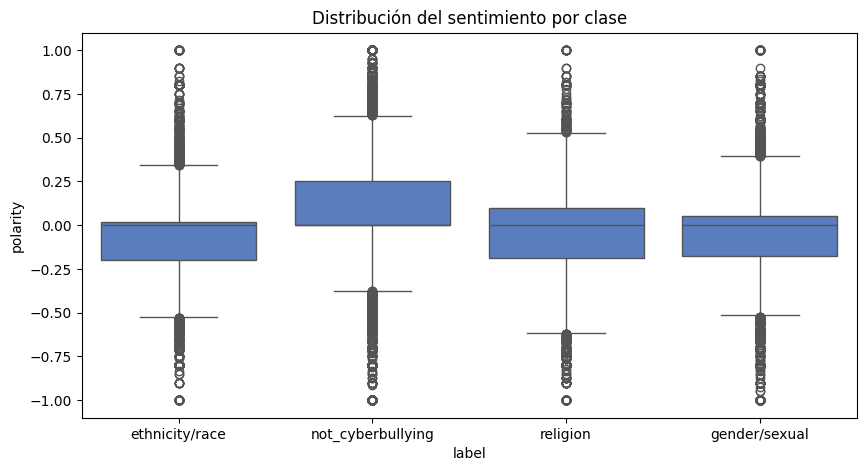

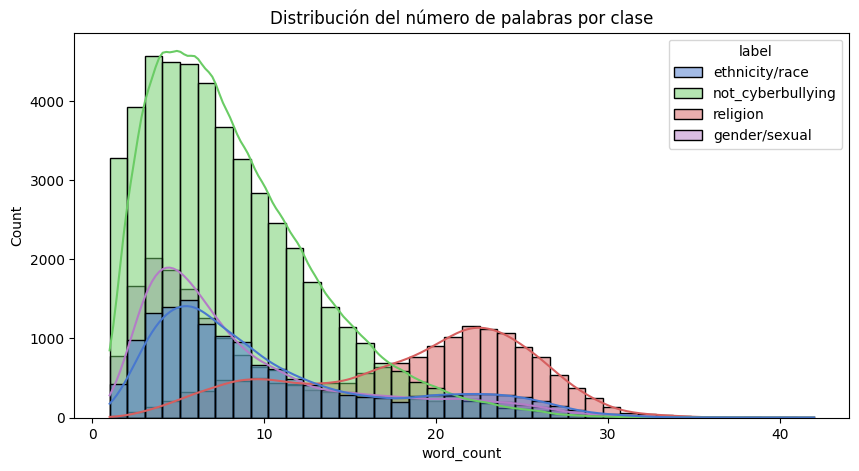

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='label', y='polarity', data=df)
plt.title('Distribución del sentimiento por clase')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=40, kde=True)
plt.title('Distribución del número de palabras por clase')
plt.show()


#### G. Guardado de transofrmadores y matrices

se asegura reproducibilidad y facilita aplicar el mismo preprocesamiento a nuevos datos o en producción.

###V.Separación del Conjunto de Datos (Train / Test / Val)

En esta etapa se realiza la **división del conjunto de datos** en subconjuntos de **entrenamiento** y **prueba**, asegurando que las proporciones originales de cada clase se mantengan mediante **estratificación**.

Este proceso permite evaluar el rendimiento de los modelos en datos no vistos, garantizando una separación adecuada entre entrenamiento y validación.

Del total del conjunto de datos procesado (`X_final`), se asignó aproximadamente el **80 % (≈ 75 000 registros)** al conjunto de **entrenamiento** y el **20 % (≈ 18 700 registros)** al conjunto de **prueba**, manteniendo la representatividad de todas las categorías.

In [ ]:
# ============================================
# SEPARACIÓN DEL CONJUNTO DE DATOS (TRAIN / TEST / VAL)
# ============================================

from sklearn.model_selection import train_test_split

# Verificamos que X_final (características) y y (etiquetas) tengan el mismo número de filas.
# Esto evita errores durante la división del conjunto.
if X_final.shape[0] != len(y):
    print("Advertencia: X_final y y tienen un número de filas diferente. Asegurando consistencia.")
    # Si hay más etiquetas que filas de características, se recortan.
    # Si hay menos etiquetas, se detiene la ejecución (para evitar inconsistencia).
    if len(y) > X_final.shape[0]:
        y = y.iloc[:X_final.shape[0]]
    elif len(y) < X_final.shape[0]:
        raise ValueError("Error: 'y' tiene menos filas que X_final. No se puede continuar de forma segura.")

# Se realiza la división del conjunto de datos:
# - 80% para entrenamiento
# - 20% para prueba
# Se usa "stratify=y" para mantener la proporción original de clases en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# Se muestran las dimensiones resultantes
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Forma de X_train: (75766, 210)
Forma de y_train: (75766,)
Forma de X_test: (18942, 210)
Forma de y_test: (18942,)


###VI. Manejo de Desbalance de Clases

Para corregirlo, se aplica la técnica de **Oversampling mediante SMOTE (Synthetic Minority Oversampling Technique)**, que genera ejemplos sintéticos de las clases minoritarias.  
De esta forma, el conjunto de entrenamiento queda equilibrado, mejorando la capacidad del modelo para aprender patrones de todas las clases por igual.

In [ ]:

# ============================================
# MANEJO DE DESBALANCE DE CLASES
# Método: Oversampling (SMOTE)
# ============================================

from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Mostramos la distribución original de clases en el conjunto de entrenamiento
print("\nDistribución original de clases en y_train:")
print(Counter(y_train))

# Se crea el objeto SMOTE (Synthetic Minority Oversampling Technique)
# Este método genera ejemplos sintéticos de las clases minoritarias
smote = SMOTE(random_state=42)

# Aplicamos SMOTE solo al conjunto de entrenamiento (no al de prueba)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Mostramos la nueva distribución de clases balanceada
print("\nDistribución balanceada de clases (después de SMOTE en y_train_res):")
print(Counter(y_train_res))





Distribución original de clases en y_train:
Counter({2: 38227, 1: 13081, 3: 12576, 0: 11882})

Distribución balanceada de clases (después de SMOTE en y_train_res):
Counter({2: 38227, 0: 38227, 1: 38227, 3: 38227})


Finalmente, se presentan **gráficas comparativas** que muestran la distribución de las clases antes y después del balanceo, evidenciando la mejora en la proporción de ejemplos.

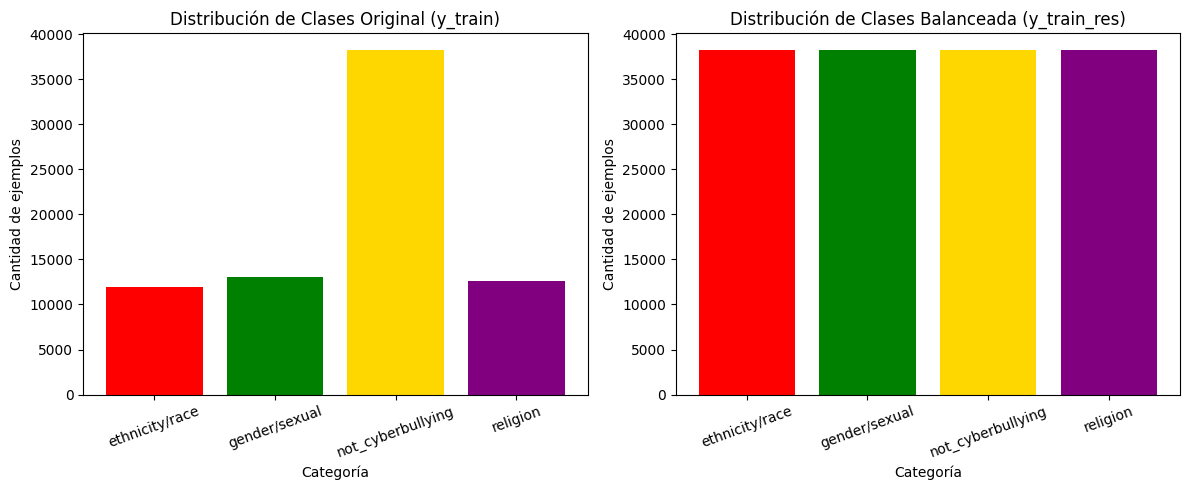

In [ ]:
# ============================================
# Visualización del balanceo de clases con nombres de categorías
# ============================================

# Obtenemos los nombres de las clases reales desde el codificador LabelEncoder
class_labels = label_encoder.classes_

# Contamos la cantidad de muestras por clase antes y después del balanceo
original_counts = [Counter(y_train)[i] for i in range(len(class_labels))]
balanced_counts = [Counter(y_train_res)[i] for i in range(len(class_labels))]

# Creamos las gráficas comparativas
plt.figure(figsize=(12, 5))

# Distribución original
plt.subplot(1, 2, 1)
plt.bar(class_labels, original_counts, color=['red', 'green', 'gold', 'purple'])
plt.title('Distribución de Clases Original (y_train)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ejemplos')
plt.xticks(rotation=20)

# Distribución balanceada
plt.subplot(1, 2, 2)
plt.bar(class_labels, balanced_counts, color=['red', 'green', 'gold', 'purple'])
plt.title('Distribución de Clases Balanceada (y_train_res)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ejemplos')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

###VII. Construcción del Pipeline  

 Reporte de Clasificación:
                   precision    recall  f1-score   support

   ethnicity/race       0.98      0.97      0.97      2971
    gender/sexual       0.97      0.99      0.98      3270
not_cyberbullying       0.99      0.99      0.99      9557
         religion       0.98      0.96      0.97      3144

         accuracy                           0.98     18942
        macro avg       0.98      0.98      0.98     18942
     weighted avg       0.98      0.98      0.98     18942



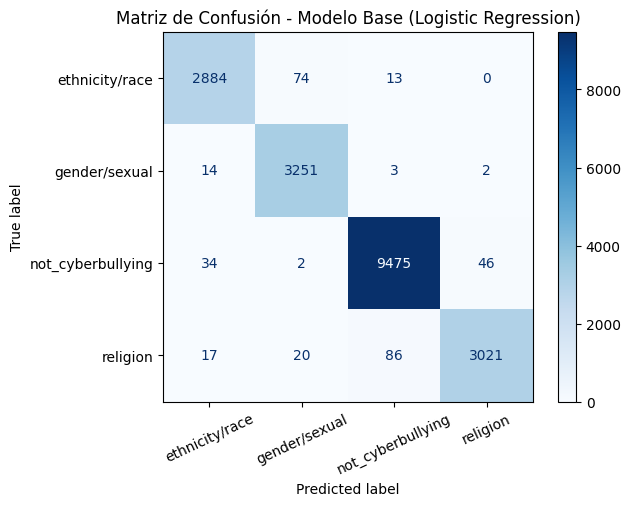

In [ ]:
# ============================================================
# Construcción del Pipeline de Aprendizaje Automático
# ============================================================

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear el Pipeline con los pasos de procesamiento y modelo
pipeline = Pipeline([
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar el modelo usando los datos balanceados (SMOTE)
pipeline.fit(X_train_res, y_train_res)

# Evaluar sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar métricas de evaluación
print(" Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=25)
plt.title("Matriz de Confusión - Modelo Base (Logistic Regression)")
plt.show()


#4.Modelado y Entrenamiento


##I. Modelos Base

###A. Baseline (Clase Mayoritaria)


En esta etapa se construye un modelo base (baseline) que sirve como punto de referencia para evaluar el desempeño de los modelos posteriores.  
El baseline se basa en una estrategia muy simple: **predecir siempre la clase mayoritaria** del conjunto de entrenamiento.  
Aunque este modelo carece de capacidad predictiva real, permite establecer un **mínimo estándar de comparación**.  
De esta forma, cualquier modelo de machine learning que no supere la precisión del baseline puede considerarse **ineficiente o mal ajustado**.

In [ ]:
# ============================================
# BASELINE: CLASE MAYORITARIA
# ============================================

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Identificar la clase mayoritaria en el conjunto de entrenamiento
from collections import Counter
mayoritaria = Counter(y_train_res).most_common(1)[0][0]

# Crear predicciones basadas en la clase mayoritaria
y_pred_baseline = np.full_like(y_test, fill_value=mayoritaria)

# Evaluar el desempeño del baseline
print("Clase mayoritaria predicha:", mayoritaria)
print("\nMétricas del modelo baseline:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_baseline, target_names=label_encoder.classes_))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Baseline (Clase Mayoritaria)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


###B. Naive Bayes
n esta etapa se implementa el modelo **Naive Bayes**, un clasificador probabilístico basado en el **teorema de Bayes** que asume independencia entre las características.  
Es ampliamente utilizado en tareas de **Procesamiento del Lenguaje Natural (PLN)** por su **simplicidad**, **rapidez** y **eficacia** en textos representados mediante vectores **TF-IDF**.


In [ ]:
# ============================================================
# 🔹 MODELO BASE: Gaussian Naive Bayes (adaptado para valores reales/negativos)
# ============================================================

from sklearn.naive_bayes import GaussianNB # Cambiado de MultinomialNB a GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo
# GaussianNB es más adecuado para características con valores reales, incluyendo negativos.
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)

# Predicción en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluación
print("📊 Resultados del modelo Gaussian Naive Bayes:\n")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

# Matriz de confusión
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Gaussian Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

###C. Regresión Logística

En esta etapa se implementa el modelo **Regresión Logística**, un método de clasificación lineal que estima la probabilidad de pertenencia a una clase mediante una función sigmoide.  
Es uno de los modelos más utilizados en tareas de texto por su interpretabilidad, eficiencia y capacidad para manejar grandes volúmenes de datos vectorizados, como los generados por **TF-IDF.**


 Evaluación del Modelo: Regresión Logística
                   precision    recall  f1-score   support

   ethnicity/race       0.98      0.97      0.97      2971
    gender/sexual       0.97      0.99      0.98      3270
not_cyberbullying       0.99      0.99      0.99      9557
         religion       0.98      0.96      0.97      3144

         accuracy                           0.98     18942
        macro avg       0.98      0.98      0.98     18942
     weighted avg       0.98      0.98      0.98     18942



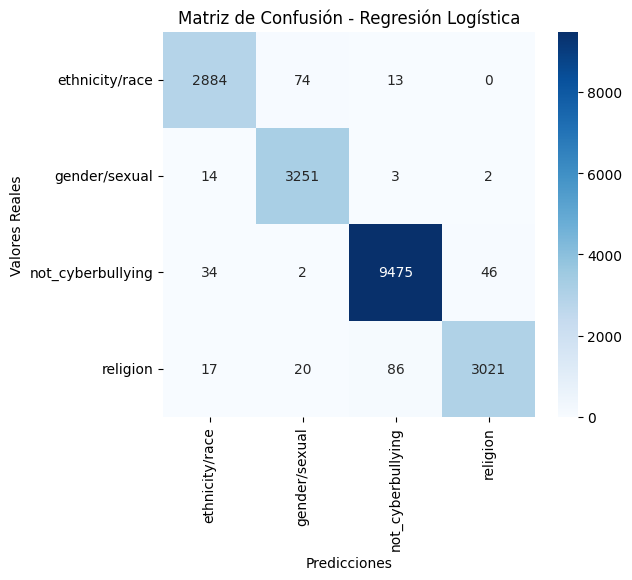

Precisión general del modelo: 0.9836


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento del modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predicciones
y_pred = log_reg.predict(X_test)

# Evaluación del modelo
print(" Evaluación del Modelo: Regresión Logística")
print("=" * 80)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión general del modelo: {accuracy:.4f}")


## II. Modelos Intermedios


###A. Linear SVC (Support Vector Classifier Lineal)
El Linear SVC es una versión del algoritmo Support Vector Machine (SVM) especializada para problemas linealmente separables o con una gran cantidad de características.

El objetivo del SVC lineal es encontrar el hiperplano que mejor separa las clases del dataset maximizando el margen entre los puntos más cercanos de clases opuestas, estos son llamados vectores de soporte.
y se representa la con siguiente ecuación:
<br>
`*w⋅x+b=0*`
<br>
Donde:
<br>
w = vector de pesos (define la dirección del hiperplano),
<br>
x = vector de características,
<br>
b = sesgo o intercepto.



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Entrenamiento del modelo
linear_svc = LinearSVC(random_state=42, C=1.0)
linear_svc.fit(X_train, y_train)

# Predicciones
y_pred_svc = linear_svc.predict(X_test)

# Evaluación del modelo
print("🔹 Evaluación del Modelo Linear SVC")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_svc))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_svc))



🔹 Evaluación del Modelo Linear SVC
Accuracy: 0.9920810896420652

Matriz de Confusión:
 [[2952    8   11    0]
 [   8 3259    2    1]
 [   8    0 9547    2]
 [   4   17   89 3034]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.99      1.00      0.99      3270
           2       0.99      1.00      0.99      9557
           3       1.00      0.97      0.98      3144

    accuracy                           0.99     18942
   macro avg       0.99      0.99      0.99     18942
weighted avg       0.99      0.99      0.99     18942



### B. Random Forest Classifier
El Random Forest es un algoritmo de aprendizaje supervisado basado en el principio de ensembles, es decir.
Está compuesto por múltiples árboles de decisión, cada uno entrenado sobre una muestra aleatoria del conjunto de datos y un subconjunto aleatorio de características.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicialización del modelo
rf_model = RandomForestClassifier(
    n_estimators=200,         # número de árboles
    max_depth=None,           # profundidad libre
    random_state=42,
    n_jobs=-1                 # uso de todos los núcleos disponibles
)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("🔹 Evaluación del Modelo Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))


# Muestra las 15 palabras más importantes
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:15]

top_features = pd.DataFrame({
    #name 'vectorizer' is not defined ERROR si alguno sabe donde esta definida la vectorizacion
    'Característica': np.array(vectorizer.get_feature_names_out())[indices],
    'Importancia': importances[indices]
})
print(top_features)


### C. MLP – Red Neuronal Simple (Multilayer Perceptron Classifier)

El Multilayer Perceptron (MLP) es un tipo de red neuronal artificial completamente conectada.
Consiste en capas de neuronas (nodos) organizadas en tres niveles principales:

*   Capa de entrada: recibe las características.
*   Capas oculas: Aplican transformaciones no lineales mediante una funcion de activación.
*   Capa de salida: produce la predicción de clase en este ejemplo bien es ofensivo o no ofensivo.



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definición del modelo
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # dos capas ocultas con 128 y 64 neuronas
    activation='relu',             # función de activación no lineal
    solver='adam',                 # optimizador adaptativo
    alpha=0.001,                   # término de regularización
    learning_rate='adaptive',
    max_iter=50,                   # número máximo de iteraciones (puedes aumentarlo)
    random_state=42
)

# Entrenamiento
mlp_model.fit(X_train, y_train)

# Predicciones
y_pred_mlp = mlp_model.predict(X_test)

# Evaluación del modelo
print("🔹 Evaluación del Modelo MLP")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_mlp))

# Ejemplo alternativo con una sola capa oculta más grande
mlp_model_alt = MLPClassifier(hidden_layer_sizes=(256,), alpha=0.0005, max_iter=80, random_state=42)


## III. Modelos avanzados

### A. Fine-tuning con Transformers (DistilBERT / BERT)
Ahora pongo la descripción

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import torch

# -------------------------------------------
# 1. Preparación del dataset
# -------------------------------------------
# Suponemos que tu dataframe tiene columnas: "clean_text" y "label"

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Crear datasets de Hugging Face
train_dataset = Dataset.from_pandas(train_df[['clean_text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['clean_text', 'label']])

# -------------------------------------------
# 2. Tokenización
# -------------------------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(example):
    return tokenizer(
        example['clean_text'],
        padding='max_length',
        truncation=True,
        max_length=128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# -------------------------------------------
# 3. Modelo preentrenado
# -------------------------------------------
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# -------------------------------------------
# 4. Configuración de entrenamiento
# -------------------------------------------
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # puedes aumentar si tienes GPU
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50
)

# -------------------------------------------
# 5. Entrenamiento
# -------------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()

# -------------------------------------------
# 6. Evaluación
# -------------------------------------------
metrics = trainer.evaluate()
print("🔹 Evaluación del modelo DistilBERT:")
print(metrics)


##IV. Optimización de Hiperparámetros (GridSearchCV / RandomizedSearchCV)

Se basa en la optimización de hiperparametros buscando las mejores configuraciones las cuales lleguen a maximizar el rendimiento del modelo en este se reajustan los siguientes parametros:
* Nº de árboles en Random Forest
* C y kernel en SVM
* Nº de neuronas en MLP
* Learning rate
* Tamaño de batch
Estos parametros no los aprende el modelo.

### GridSearchCV con LinearSVC con X_tfidf
Busqueda exhaustiva explora todas las configuraciones posibles de los hiperparamtros usando:
* C: como parametro de fuerza de regularización del modelo.
* ioos: como funcion de perdida.

El procedimiento aplicado fue:
* Aplicar TF-IDF al texto procesado → obtención de X_tfidf en la unidad 3 del procesado de datos.
* Dividir los datos en entrenamiento y prueba.
* Ejecutar GridSearchCV sobre LinearSVC.
* Seleccionar los parametros estamidados con mejor rendimiento.
* Evaluarlo sobre el conjunto de prueba en función de su rendimiento.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Re-definir X_tfidf y y para asegurar que estén en scope
# Asumiendo que df está disponible de celdas anteriores
if 'df' in globals():
    # Asegurar que 'lemmatized_text' y 'label_encoded' existen o recrearlos si es necesario
    if 'lemmatized_text' not in df.columns or 'label_encoded' not in df.columns:
        # Este es un punto crítico, si no existen, el resto fallará.
        # Para una solución robusta, se deberían recrear aquí o el usuario debe ejecutar celdas previas.
        # Por simplicidad en este fix, asumimos que 'df' tiene 'lemmatized_text' y 'label_encoded'
        # Si no es así, el usuario tendrá que ejecutar las celdas de preprocesamiento.
        print("Advertencia: 'lemmatized_text' o 'label_encoded' no encontrados en df. Asegúrese de que las celdas de preprocesamiento se hayan ejecutado.")

    tfidf = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
        sublinear_tf=True,
        stop_words='english'
    )
    X_tfidf = tfidf.fit_transform(df['lemmatized_text'])

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['label'])
else:
    raise NameError("DataFrame 'df' no encontrado. Asegúrese de que las celdas de carga y preprocesamiento de datos se hayan ejecutado.")

# División de los datos para variar al modelo
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Parrilla de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

svc = LinearSVC()

grid_search = GridSearchCV(
    svc,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tfidf, y_train_tfidf)

print("\nMejores parámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test_tfidf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores parámetros: {'C': 1, 'loss': 'squared_hinge'}

Accuracy: 0.994667933692324

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       1.00      1.00      1.00      3270
           2       0.99      1.00      1.00      9557
           3       1.00      0.98      0.99      3144

    accuracy                           0.99     18942
   macro avg       1.00      0.99      0.99     18942
weighted avg       0.99      0.99      0.99     18942



### B. RandomizedSearchCV con Random Forest (USANDO X_tfidf)
Permite optimizar su configuración a comparación del anterior metodo. A comparación del anterior este metodo no prueba todas las combinaciones posibles, si no que selecciona de forma aleatoria un numero o un valor para las configuraciones posibles dentro del espacio de los hiperparametros asigados, esto le permite explorar un mayor rango con un menor costo computacional.
Estos son los hiperprarametros:
* n_estimators: número de árboles en el bosque
* max_depth: profundidad máxima de los árboles
* min_samples_split: mínimo de muestras para dividir un nodo
* min_samples_leaf: mínimo de muestras por hoja

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Re-definir X_tfidf y y para asegurar que estén en scope
# Asumiendo que df está disponible de celdas anteriores
if 'df' in globals():
    if 'lemmatized_text' not in df.columns or 'label_encoded' not in df.columns:
        print("Advertencia: 'lemmatized_text' o 'label_encoded' no encontrados en df. Asegúrese de que las celdas de preprocesamiento se hayan ejecutado.")

    tfidf = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
        sublinear_tf=True,
        stop_words='english'
    )
    X_tfidf = tfidf.fit_transform(df['lemmatized_text'])

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['label'])
else:
    raise NameError("DataFrame 'df' no encontrado. Asegúrese de que las celdas de carga y preprocesamiento de datos se hayan ejecutado.")

# División de los datos para variar al modelo
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,  #probando con uno más ligero
    cv=3, #Validación cruzada más baja como prueba al rendimiento
    scoring='f1_macro', #Formula para medir el rendimiento
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_tfidf, y_train_tfidf)

print("\nMejores parámetros:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test_tfidf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Mejores parámetros: {'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 444}

Accuracy: 0.802660753880266

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70      2971
           1       0.99      0.34      0.50      3270
           2       0.72      1.00      0.84      9557
           3       1.00      0.93      0.97      3144

    accuracy                           0.80     18942
   macro avg       0.93      0.70      0.75     18942
weighted avg       0.86      0.80      0.78     18942



Ejecutando experimentos para LinearSVC...
Ejecutando experimentos para RandomForest...


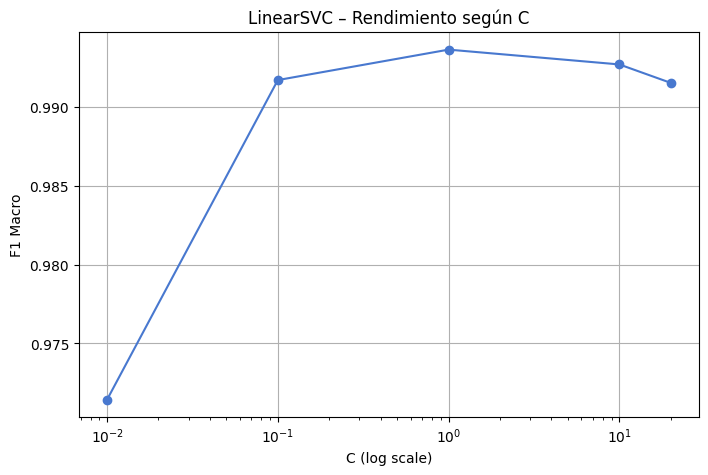

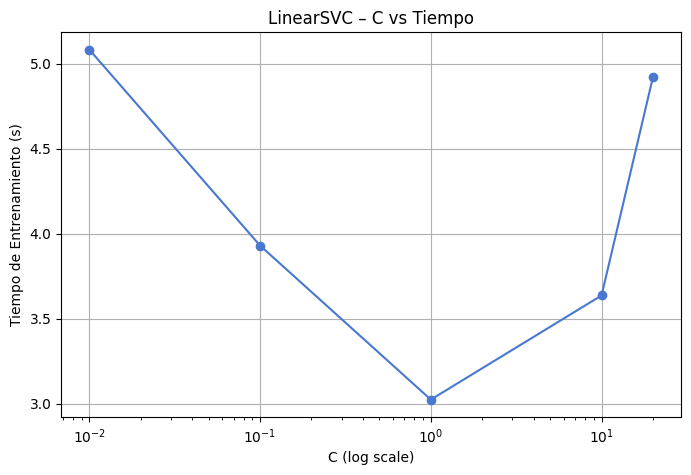

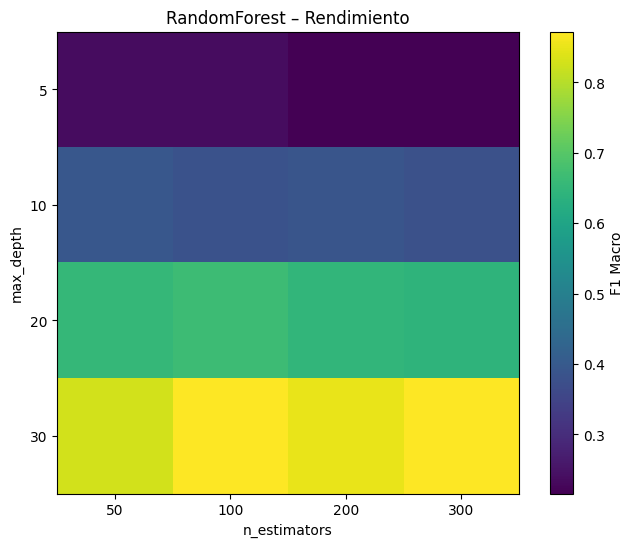

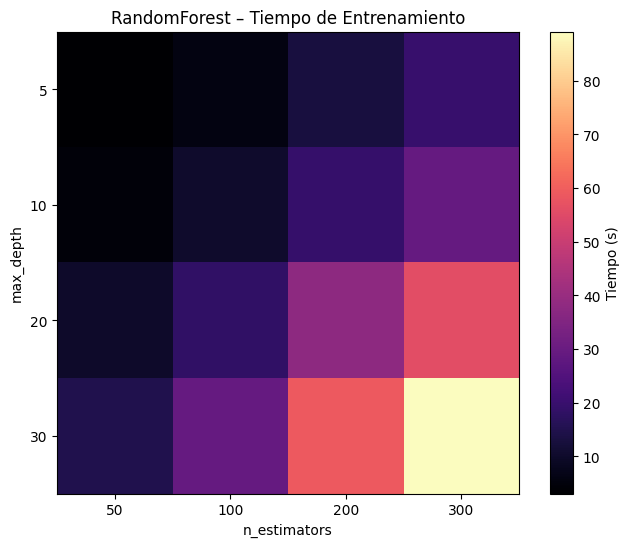


===== Análisis Automático =====

Mejor LinearSVC → C=1.0 | F1=0.9937 | Tiempo=3.02s
Mejor RandomForest → depth=30.0 | trees=100.0 | F1=0.8722 | Tiempo=29.30s

Conclusión: LinearSVC logra mejor rendimiento para este dataset TF-IDF y además entrena mucho más rápido.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# ======================================================
# FUNCIÓN PARA EXPERIMENTOS DE LINEARSVC
# ======================================================
def experiment_linear_svc(X, y, C_values):
    results = []

    for C in C_values:
        model = LinearSVC(C=C)

        start = time.time()
        scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
        end = time.time()

        results.append({
            'C': C,
            'F1_mean': scores.mean(),
            'F1_std': scores.std(),
            'Train_time': end - start
        })

    return pd.DataFrame(results)


# ======================================================
# FUNCIÓN PARA EXPERIMENTOS DE RANDOM FOREST
# ======================================================
def experiment_random_forest(X, y, depths, estimators):
    results = []

    for d in depths:
        for n in estimators:
            model = RandomForestClassifier(
                max_depth=d,
                n_estimators=n,
                random_state=42
            )

            start = time.time()
            scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
            end = time.time()

            results.append({
                'max_depth': d,
                'n_estimators': n,
                'F1_mean': scores.mean(),
                'F1_std': scores.std(),
                'Train_time': end - start
            })

    return pd.DataFrame(results)


# ======================================================
# CORRER EXPERIMENTOS
# ======================================================
C_values = [0.01, 0.1, 1, 10, 20]
depths = [5, 10, 20, 30]
estimators = [50, 100, 200, 300]

print("Ejecutando experimentos para LinearSVC...")
df_svc = experiment_linear_svc(X_tfidf, y, C_values)

print("Ejecutando experimentos para RandomForest...")
df_rf = experiment_random_forest(X_tfidf, y, depths, estimators)

# ======================================================
# GRAFICAR RESULTADOS
# ======================================================

# ---- Linear SVC: C vs F1
plt.figure(figsize=(8,5))
plt.plot(df_svc['C'], df_svc['F1_mean'], marker='o')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("F1 Macro")
plt.title("LinearSVC – Rendimiento según C")
plt.grid(True)
plt.show()

# ---- Linear SVC: C vs Tiempo
plt.figure(figsize=(8,5))
plt.plot(df_svc['C'], df_svc['Train_time'], marker='o')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Tiempo de Entrenamiento (s)")
plt.title("LinearSVC – C vs Tiempo")
plt.grid(True)
plt.show()

# ---- RandomForest: Heatmap F1
pivot_rf = df_rf.pivot(index='max_depth', columns='n_estimators', values='F1_mean')

plt.figure(figsize=(8,6))
plt.imshow(pivot_rf, cmap='viridis')
plt.colorbar(label='F1 Macro')
plt.xticks(range(len(estimators)), estimators)
plt.yticks(range(len(depths)), depths)
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("RandomForest – Rendimiento")
plt.show()

# ---- RandomForest: Heatmap Tiempo
pivot_time = df_rf.pivot(index='max_depth', columns='n_estimators', values='Train_time')

plt.figure(figsize=(8,6))
plt.imshow(pivot_time, cmap='magma')
plt.colorbar(label='Tiempo (s)')
plt.xticks(range(len(estimators)), estimators)
plt.yticks(range(len(depths)), depths)
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("RandomForest – Tiempo de Entrenamiento")
plt.show()


# ======================================================
# ANÁLISIS AUTOMÁTICO PARA TU REPORTE
# ======================================================
print("\n===== Análisis Automático =====\n")

best_svc = df_svc.loc[df_svc['F1_mean'].idxmax()]
best_rf = df_rf.loc[df_rf['F1_mean'].idxmax()]

print(f"Mejor LinearSVC → C={best_svc['C']} | F1={best_svc['F1_mean']:.4f} | Tiempo={best_svc['Train_time']:.2f}s")
print(f"Mejor RandomForest → depth={best_rf['max_depth']} | trees={best_rf['n_estimators']} | F1={best_rf['F1_mean']:.4f} | Tiempo={best_rf['Train_time']:.2f}s")

if best_svc['F1_mean'] > best_rf['F1_mean']:
    print("\nConclusión: LinearSVC logra mejor rendimiento para este dataset TF-IDF y además entrena mucho más rápido.")
else:
    print("\nConclusión: RandomForest supera a LinearSVC, aunque requiere tiempos más largos de entrenamiento.")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# ======================================================
# EXPERIMENTO LINEAR SVC (1 configuración → 1 resultado)
# ======================================================
def run_linear_svc(X, y, C):
    model = LinearSVC(C=C)

    start = time.time()
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
    end = time.time()

    return {
        'C': C,
        'F1_mean': scores.mean(),
        'F1_std': scores.std(),
        'Train_time': end - start
    }

# ======================================================
# EXPERIMENTO RANDOM FOREST (1 configuración → 1 resultado)
# ======================================================
def run_random_forest(X, y, depth, estimators):
    model = RandomForestClassifier(
        max_depth=depth,
        n_estimators=estimators,
        random_state=42
    )

    start = time.time()
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
    end = time.time()

    return {
        'max_depth': depth,
        'n_estimators': estimators,
        'F1_mean': scores.mean(),
        'F1_std': scores.std(),
        'Train_time': end - start
    }


# ======================================================
# CONFIGURACIONES
# ======================================================
C_values = [0.01, 0.1, 1, 10, 20]
depths = [5, 10, 20, 30]
estimators = [50, 100, 200, 300]

# emparejar configuraciones
pair_count = min(len(C_values), len(depths) * len(estimators))

# Creamos la lista de pares comparativos
pairs = []
idx = 0
for d in depths:
    for n in estimators:
        if idx >= len(C_values):
            break
        pairs.append((C_values[idx], d, n))
        idx += 1


# ======================================================
# EJECUCIÓN + GRÁFICAS COMPARATIVAS
# ======================================================
results_svc = []
results_rf = []

for C, d, n in pairs:

    print(f"\n=== Probando SVC(C={C}) VS RF(depth={d}, estimators={n}) ===")

    r_svc = run_linear_svc(X_tfidf, y, C)
    r_rf  = run_random_forest(X_tfidf, y, d, n)

    results_svc.append(r_svc)
    results_rf.append(r_rf)

    # =======================
    # GRAFICAR COMPARACIÓN
    # =======================

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ---- Gráfica del SVC
    axes[0].bar(["F1", "Tiempo"], [r_svc["F1_mean"], r_svc["Train_time"]])
    axes[0].set_title(f"LinearSVC (C={C})")
    axes[0].set_ylim(0, max(r_svc["Train_time"], r_rf["Train_time"]) * 1.2)

    # ---- Gráfica del RF
    axes[1].bar(["F1", "Tiempo"], [r_rf["F1_mean"], r_rf["Train_time"]])
    axes[1].set_title(f"RandomForest (depth={d}, estimators={n})")
    axes[1].set_ylim(0, max(r_svc["Train_time"], r_rf["Train_time"]) * 1.2)

    plt.suptitle("Comparación Modelo 1 vs Modelo 2")
    plt.show()



# ======================================================
# DATAFRAMES FINALES
# ======================================================
df_svc = pd.DataFrame(results_svc)
df_rf  = pd.DataFrame(results_rf)

print("\n========== RESULTADOS FINALES ==========\n")
print(df_svc)
print("\n----------------------------------------\n")
print(df_rf)


# ======================================================
# ANÁLISIS AUTOMÁTICO
# ======================================================
best_svc = df_svc.loc[df_svc['F1_mean'].idxmax()]
best_rf = df_rf.loc[df_rf['F1_mean'].idxmax()]

print("\n===== ANÁLISIS AUTOMÁTICO =====")

print(f"\n Mejor LinearSVC → C={best_svc['C']} | F1={best_svc['F1_mean']:.4f} | Tiempo={best_svc['Train_time']:.2f}s")
print(f"Mejor RandomForest → depth={best_rf['max_depth']} | trees={best_rf['n_estimators']} | F1={best_rf['F1_mean']:.4f} | Tiempo={best_rf['Train_time']:.2f}s")

if best_svc['F1_mean'] > best_rf['F1_mean']:
    print("\n🏆 Conclusión: LinearSVC logra mejor rendimiento y además entrena mucho más rápido.")
else:
    print("\n🏆 Conclusión: RandomForest supera en rendimiento, aunque tarda más en entrenar.")



=== Probando SVC(C=0.01) VS RF(depth=5, estimators=50) ===


NameError: name 'X_tfidf' is not defined

## V. Validación Cruzada
Con esta tecnica podemos evaluar la capacidad de generalización del modelo, es decir probar el modelo con diferentes con diferentes datasets para evaluarlo multiples veces permitiendo reducir la varianza, resultados con sesgos y brindando una evaluación mucho mas confiable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


# FUNCIÓN GENERAL PARA VALIDAR UN MODELO EN K-FOLDS
def kfold_validate(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    fold_results = []   # ← almacenar resultados por fold
    f1_scores = []
    times = []

    fold_id = 1

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        start = time.time()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        end = time.time()

        f1 = f1_score(y_test, pred, average="macro")
        elapsed = end - start

        f1_scores.append(f1)
        times.append(elapsed)

        # Guardar tabla por fold
        fold_results.append({
            "Fold": fold_id,
            "F1": f"{f1:.4f}",
            "Tiempo (s)": f"{elapsed:.2f}"
        })

        fold_id += 1

    # Convertir a DataFrame la tabla
    fold_table = pd.DataFrame(fold_results)

    return f1_scores, times, fold_table





# variacion de configuraciones (editar para probar)
C_values = [0.01, 0.1, 1, 10]
depths = [5, 10, 20]
estimators = [50, 100, 200]

# Emparejar configuraciones una por una
pairs = []
idx = 0
for d in depths:
    for n in estimators:
        if idx >= len(C_values):
            break
        pairs.append((C_values[idx], d, n))
        idx += 1


# ejecucion de validacion cruzada
svc_results = []
rf_results = []

for C, d, n in pairs:

    print(f"\n=============================")
    print(f"Validando SVC(C={C}) vs RF(depth={d}, trees={n})")
    print("=============================")

    # Linear SVC --------------------------
    svc_f1, svc_time, svc_table = kfold_validate(svc_model, X_tfidf, y)
    rf_f1, rf_time, rf_table = kfold_validate(rf_model, X_tfidf, y)

    print("\nTabla SVC:")
    print(svc_table)

    print("\nTabla RF:")
    print(rf_table)


    svc_results.append({
        "Modelo": "SVC",
        "C": C,
        "F1_mean": np.mean(svc_f1),
        "F1_std": np.std(svc_f1),
        "Time_mean": np.mean(svc_time)
    })

    # Random Forest -----------------
    rf_model = RandomForestClassifier(max_depth=d, n_estimators=n, random_state=42)
    rf_f1, rf_time = kfold_validate(rf_model, X_tfidf, y)

    rf_results.append({
        "Modelo": "RF",
        "max_depth": d,
        "n_estimators": n,
        "F1_mean": np.mean(rf_f1),
        "F1_std": np.std(rf_f1),
        "Time_mean": np.mean(rf_time)
    })



    # graficas de FOLDS SVC vs RF
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))

    # --- F1 por fold
    ax[0].plot(range(1, 6), svc_f1, marker="o", label=f"SVC C={C}")
    ax[0].plot(range(1, 6), rf_f1, marker="o", label=f"RF depth={d} n={n}")
    ax[0].set_title("F1 por Fold")
    ax[0].set_xlabel("Fold")
    ax[0].set_ylabel("F1 Macro")
    ax[0].grid(True)
    ax[0].legend()

    # Tiempos por fold
    ax[1].plot(range(1, 6), svc_time, marker="o", label=f"SVC C={C}")
    ax[1].plot(range(1, 6), rf_time, marker="o", label=f"RF depth={d} n={n}")
    ax[1].set_title("Tiempo por Fold")
    ax[1].set_xlabel("Fold")
    ax[1].set_ylabel("Tiempo (s)")
    ax[1].grid(True)
    ax[1].legend()

    plt.suptitle(f"VALIDACIÓN CRUZADA COMPARADA\nSVC(C={C}) vs RF(d={d}, n={n})")
    plt.show()



#Mostrando las tablas resultantes
df_svc = pd.DataFrame(svc_results)
df_rf = pd.DataFrame(rf_results)

print("\n==================== RESULTADOS SVC ====================")
print(df_svc)

print("\n==================== RESULTADOS RF =====================")
print(df_rf)

#Analisis de resultados
best_svc = df_svc.loc[df_svc['F1_mean'].idxmax()]
best_rf = df_rf.loc[df_rf['F1_mean'].idxmax()]

print("\n==================== ANÁLISIS FINAL ====================")
print(f"\nMejor SVC → C={best_svc['C']} | F1={best_svc['F1_mean']:.4f} | Tiempo={best_svc['Time_mean']:.2f}s")
print(f"Mejor RF → depth={best_rf['max_depth']} | trees={best_rf['n_estimators']} | F1={best_rf['F1_mean']:.4f} | Tiempo={best_rf['Time_mean']:.2f}s")

if best_svc['F1_mean'] > best_rf['F1_mean']:
    print("\nConclusión: LinearSVC obtiene mejor rendimiento general y es más rápido en validación cruzada.")
else:
    print("\nConclusión: RandomForest supera a LinearSVC en F1, aunque tarda bastante más en entrenamiento.")




Validando SVC(C=0.01) vs RF(depth=5, trees=50)


NameError: name 'svc_model' is not defined

# 5. Evaluación y Resultados

## I. Métricas de Evaluación (Accuracy, F1, Recall, Precision)  

## II. Resultados en Validación Cruzada  
En la validación cruzada se aplico los modelos Liear SVC y al Random Forest con diferentes configuraciones en los hiperparametros, esto con el fin de evaluar la estabilidad del rendimiento de estos modelos, su variabilidad entre los folds los cuales son las divisiones o particiones del dataset para evaluarlo n veces y el tiempo de entrenamiento de cada modelo en diferentes niveles de complejidad.



### LinearSVC resultados:
Se muestran los siguientes resultados:
  Fold 1: F1=0.9713  tiempo=0.70s
  Fold 2: F1=0.9704  tiempo=1.64s
  Fold 3: F1=0.9711  tiempo=1.09s
  Fold 4: F1=0.9728  tiempo=1.16s
  Fold 5: F1=0.9698  tiempo=1.06s


### RandomForest resultados:
En este modelo se presentaron los siguientes resultados en las pruebas la validación cruzada:


####Analisis:
De estos resultados se pudo concluir que:

* F1-Macro sustancialmente más bajo en la mayoría de las configuraciones.
* Mayor variabilidad entre configuraciones e incluso entre folds.
* Tiempos de entrenamiento más altos, especialmente para modelos con más árboles.

Además se pudo notar que con `*max_depth=5*` y `50–100 árboles, los resultados se mantienen alrededor de F1≈0.23–0.24, lo que indica un rendimiento pobre, debido a que xxxxxxxxxxxxxxxx.
Al incrementar el parametro n_estimators a 200 empeora el desempeño  aproximadamente de F1≈0.21 y aumenta notablemente el tiempo de entrenamiento.
La única mejora significativa aparece con max_depth=10 y 50 árboles, alcanzando F1≈0.3986, el mejor resultado del Random Forest.
Aun así, este valor está muy por debajo de cualquier configuración de SVC.

Los tiempos oscilan entre 1–2.7 s por fold, más altos que SVC.


#### Conclusiones:
El modelo no logra capturar adecuadamente las características generadas por TF-IDF, debido a la alta dimensionalidad y dispersión del espacio vectorial.

RF necesita árboles muy profundos para competir, pero eso incrementaría aún más el tiempo de entrenamiento y riesgo de sobreajuste.

Incluso su mejor configuración (depth=10, 50 árboles) queda lejos del rendimiento del SVC.


###Comparación entre ambos modelos:


## III. Resultados en el Conjunto de Prueba

## IV. Matriz de Confusión      

## V. Curvas ROC y Precision-Recall  
   

##  VI. Comparativa Global de Modelos

# 8. Apendice


### I. hola
### II. hola
### III. hola
### IV. Referencias bibliograficas
[1] Kaggle. (2023). Cyberbullying Detection Dataset. CC0: Public Domain.  
[2] Prados, M. Á. H., & Fernández, I. M. S. (2007). Ciberbullying, un problema de acoso escolar. RIED-Revista iberoamericana de educación a distancia, 10(1), 17-36.  
[3]Luna, R. A. (2014). Cyberbullying: acoso utilizando medios electrónicos.
